![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Chicago Cab Fare Predictor using Linear Regression

Accurately predicting the cost of a taxi ride can provide valuable insights for both riders and service providers, enabling more informed decisions and better financial planning. In this project, we focus on building a **Linear Regression model** to predict taxi fares in **Chicago, Illinois**. By analyzing patterns in historical data, we aim to create a model that can reliably estimate the fare for a given trip.

The [dataset used in this project](https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv) is a **subset of the [City of Chicago Taxi Trips dataset](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew)**, specifically **focusing on a two-day period in May 2022**. This data contains key features such as trip distance, pickup/dropoff locations, and ride duration, which we will leverage to train our predictive model.

**Project Objectives:**

- **Dataset:** A cleaned and preprocessed subset of taxi trips over a two-day period in May 2022.

- **Model:** A Linear Regression model that predicts the fare based on input features like trip distance, time of day, and other relevant variables.

- **Goal:** To build an accurate fare predictor that can assist in understanding taxi fare dynamics in Chicago.

This project not only serves as a practical application of regression modeling but also offers insights into the pricing structure of taxi services in a major metropolitan area.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Part I: Initial Setup

## 1. Import Required Libraries

In [1]:
# General Imports
import io

# Data Processing
import numpy as np
import pandas as pd

# Machine Learning
import keras

# Data Visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

## 2. Load the Dataset

In [2]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [3]:
print(f"Shape of dataset: {chicago_taxi_dataset.shape}")

Shape of dataset: (31694, 18)


In [4]:
chicago_taxi_dataset.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


## 3. Update the Dataframe

From the loaded `chicago_taxi_dataset`, we are selecting only the relevant columns: `TRIP_MILES`, `TRIP_SECONDS`, `FARE`, `COMPANY`, `PAYMENT_TYPE`, and `TIP_RATE`.

In [5]:
# Update the DataFrame to use only specific columns from the dataset
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print(f"Total number of rows: {len(training_df.index)}")
print(f"Shape of dataset: {training_df.shape}\n\n")
training_df.head(200)

Total number of rows: 31694
Shape of dataset: (31694, 6)




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Part II: Dataset Exploration

## 1. View Descriptive Statistics of the Dataset

In Pandas, the `DataFrame.describe()` method is used to generate descriptive statistics of a DataFrame, providing a summary of the central tendency, dispersion, and shape of a dataset's distribution for numerical columns.

Here's what `DataFrame.describe()` typically returns for numerical columns:

- **Count:** The number of non-null values.
- **Mean:** The average of the values.
- **Std:** The standard deviation, which measures the amount of variation or dispersion.
- **Min:** The minimum value.
- **25%:** The 25th percentile (first quartile).
- **50%:** The 50th percentile (median or second quartile).
- **75%:** The 75th percentile (third quartile).
- **Max:** The maximum value.

For categorical or object data types, you can use `DataFrame.describe(include=['object'])`, and it will return:

- **Count:** The number of non-null entries.
- **Unique:** The number of unique values.
- **Top:** The most frequent value.
- **Freq:** The frequency of the most frequent value.

**Note 1**

The `DataFrame.describe()` method is useful for getting a quick overview of your data and identifying patterns or outliers.

**Note 2**

The `include='all'` argument ensures that both numerical and categorical data are included in the summary.

In [6]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


**Note**

You might be wondering why there are groups of `NaN` (not a number) values listed in the output. When working with data in Python, you may see this value if the result of a calculation can not be computed or if there is missing information. For example, in the taxi dataset `PAYMENT_TYPE` and `COMPANY` are non-numeric, categorical features; numeric information such as mean and max do not make sense for categorical features so the output displays `NaN`.

## 2. Dataset Analysis

Now we are going to analyze the subset of the Chicago Taxi Trips dataset using `pandas`. We'll answer specific questions about the dataset, such as the maximum fare, the mean trip distance, the number of cab companies, the most frequent payment type, and whether any features have missing data.

### Step 1: Finding the Maximum Fare

We use the `max()` function to find the maximum fare from the `FARE` column. This gives us the highest fare recorded in the dataset.

In [7]:
max_fare = training_df['FARE'].max()
print(f"Maximum Fare: ${max_fare:.2f}")

Maximum Fare: $159.25


### Step 2: Calculating the Mean Distance Across All Trips

The `mean()` function computes the average of all values in the `TRIP_MILES` column. This gives us the mean trip distance across all taxi rides in the dataset.

In [8]:
mean_distance = training_df['TRIP_MILES'].mean()
print(f"Mean Distance: {mean_distance:.2f} miles")

Mean Distance: 8.29 miles


### Step 3: Counting the Number of Cab Companies

Here, we use the `nunique()` function on the `COMPANY` column to determine the number of unique cab companies in the dataset.

In [9]:
num_unique_companies =  training_df['COMPANY'].nunique()
print(f"Number of Cab Companies: {num_unique_companies}")

Number of Cab Companies: 31


### Step 4: Identifying the Most Frequent Payment Type

The `value_counts()` function counts the occurrences of each payment type in the `PAYMENT_TYPE` column, and `idxmax()` returns the most frequent one. This helps us identify the most commonly used payment method for taxi rides.

In [10]:
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print(f"Most Frequent Payment Type: {most_freq_payment_type}")

Most Frequent Payment Type: Credit Card


### Step 5: Checking for Missing Data

We use the `isnull().sum().sum()` chain to check for missing values. First `isnull()` returns a DataFrame of boolean values indicating where data is missing. `sum()` counts the number of missing values per column, and another `sum()` aggregates this count across all columns. If the result is 0, there are no missing values; otherwise, there are missing entries in the dataset.

In [13]:
n_missing_values = training_df.isnull().sum().sum()
print(f"Number of Missing Values: {n_missing_values}")
is_missing = "Yes" if n_missing_values > 0 else "No"
print(f"Are any features missing data?\t{is_missing}")

Number of Missing Values: 0
Are any features missing data?	No


## 3. Generate Correlation Matrix

In this section, we'll generate and analyze a correlation matrix to understand which features in the dataset are most closely related to our target variable, `FARE`. Correlation measures the strength of the linear relationship between two variables, with values ranging from -1 to 1. A value closer to 1 or -1 indicates a strong relationship, while values near 0 indicate a weak or no relationship.

Correlation values have the following meanings:

- **1.0:** Perfect **positive correlation** — when one attribute increases, the other attribute also increases.

- **-1.0:** Perfect **negative correlation** — when one attribute increases, the other attribute decreases.

- **0.0:** **No correlation** — the two attributes are not linearly related.

In general, the **higher the absolute value** of a correlation, the **greater its predictive power**.

### Step 1: View the Correlation Matrix

The `corr()` function is used to compute the pairwise correlation of the features in the dataset. We pass `numeric_only=True` to limit the correlation calculation to numeric columns. This matrix shows how strongly each feature is related to one another and to the target label, `FARE`.

In [14]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


### Step 2: Identify the Feature with the Strongest Correlation to the Label `FARE`

From the correlation matrix, we can see that `TRIP_MILES` has the strongest positive correlation with `FARE`. This indicates that longer trips (in miles) tend to result in higher fares, which is expected. Additionally, `TRIP_SECONDS` (trip duration) also shows a strong correlation with the fare, meaning that both distance and time are important factors in predicting fare.

### Step 3: Identify the Feature with the Weakest Correlation to the Label `FARE`

The feature with the weakest correlation to the label `FARE` is `TIP_RATE`. This suggests that the amount tipped does not strongly influence the base fare, which makes sense because tips are generally independent of the fare amount and are often influenced by other factors like service quality.

## 4. Visualize Relationships in the Dataset

To better understand the relationships between features in the dataset, we can visualize them using a pair plot. A pair plot generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.This helps us spot potential correlations or trends between variables, which might not be immediately obvious from numerical data alone.

In this case, we are plotting the following features: `FARE`, `TRIP_MILES`, and `TRIP_SECONDS`.

Each pair plot shows a scatter plot of the relationship between two features, allowing us to observe how one feature changes as the other changes. Diagonal plots show the distribution of individual features, while off-diagonal plots show the relationships between different features.

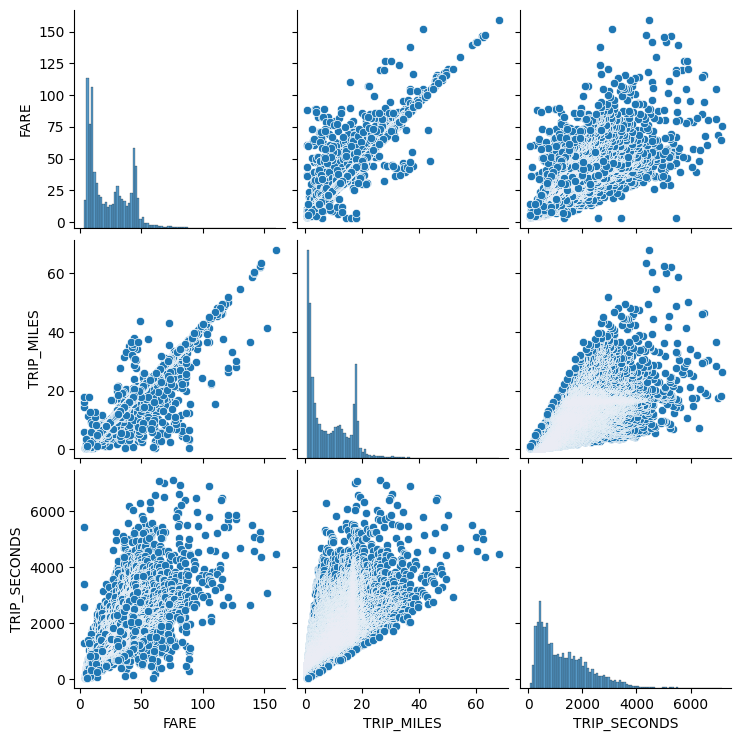

In [15]:
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

**Note**

Using pair plots, we can quickly visualize any potential linear relationships, clusters, or outliers in the data, which will help guide our next steps in feature selection and model building.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Part III: Train the Model

## 1. Define Plotting Functions

In this subsection, we define custom plotting functions to help visualize the model's performance, the relationship between features, and how the model's predictions compare to the actual data.

### Step 1: Define the `make_plots` Function

The `make_plots` function generates a visual representation of the training process. It takes a sample from the data and plots both the model's predictions and the actual data. The function includes:

- A **scatter plot or surface plot** for visualizing the relationship between features and the label.

- A **loss curve** to show the model's error reduction over epochs.

In [17]:
def make_plots(df, feature_names, label_name, model_output, sample_size=200):
    random_sample = df.sample(n=sample_size).copy()
    random_sample.reset_index()
    weights, bias, epochs, rmse = model_output

    is_2d_plot = len(feature_names) == 1
    model_plot_type = "scatter" if is_2d_plot else "surface"
    fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

    plot_data(random_sample, feature_names, label_name, fig)
    plot_model(random_sample, feature_names, weights, bias, fig)
    plot_loss_curve(epochs, rmse, fig)

    fig.show()

    return

### Step 2: Define the `plot_loss_curve` Function

The plot_loss_curve function generates a plot of the **Root Mean Squared Error (RMSE)** over the epochs. This helps us visualize how well the model improves its predictions as training progresses.

- **x-axis:** Epoch number.

- **y-axis:** RMSE (a measure of error).

In [18]:
def plot_loss_curve(epochs, rmse, fig):
    curve = px.line(x=epochs, y=rmse)
    curve.update_traces(line_color='#ff0000', line_width=3)

    fig.append_trace(curve.data[0], row=1, col=1)
    fig.update_xaxes(title_text="Epoch", row=1, col=1)
    fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

    return

### Step 3: Define the `plot_data` Function

The plot_data function visualizes the **actual data points**. Depending on the number of features, it generates either:

- A **2D scatter plot** if there's a single feature.

- A **3D scatter plot** for two features, with the label on the z-axis.

In [19]:
def plot_data(df, features, label, fig):
    if len(features) == 1:
        scatter = px.scatter(df, x=features[0], y=label)
    else:
        scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

    fig.append_trace(scatter.data[0], row=1, col=2)
    if len(features) == 1:
        fig.update_xaxes(title_text=features[0], row=1, col=2)
        fig.update_yaxes(title_text=label, row=1, col=2)
    else:
        fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

    return

### Step 4: Define the `plot_model` Function

The `plot_model` function generates a **prediction line** (for 1 feature) or a **prediction plane** (for 2 features) based on the model's learned weights and bias. It visualizes how well the model fits the actual data.

In [20]:
def plot_model(df, features, weights, bias, fig):
    df['FARE_PREDICTED'] = bias[0]

    for index, feature in enumerate(features):
        df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

    if len(features) == 1:
        model = px.line(df, x=features[0], y='FARE_PREDICTED')
        model.update_traces(line_color='#ff0000', line_width=3)
    else:
        z_name, y_name = "FARE_PREDICTED", features[1]
        z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
        y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
        x = []
        for i in range(len(y)):
            x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

        plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

        light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
        model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

    fig.add_trace(model.data[0], row=1, col=2)

    return

### Step 5: Define the `model_info` Function

The `model_info` function provides a textual summary of the model, including:

- **Weights** for each feature.
    - The **bias** term.
    - A formatted equation that represents the linear model based on the features.

In [21]:
def model_info(feature_names, label_name, model_output):
    weights = model_output[0]
    bias = model_output[1]

    nl = "\n"
    header = "-" * 80
    banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

    info = ""
    equation = label_name + " = "

    for index, feature in enumerate(feature_names):
        info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
        equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

    info = info + "Bias: {:.3f}\n".format(bias[0])
    equation = equation + "{:.3f}\n".format(bias[0])

    return banner + nl + info + nl + equation

## 2. Define ML Functions

In this subsection, we define essential machine learning functions to build, train, and evaluate a Linear Regression model.

### Step 1: Define the `build_model` Function

The `build_model` function creates and compiles a simple linear regression model using Keras. This function sets up a sequential model with a single dense layer. The key parameters include:

- **Units:** Defines the number of output neurons (set to 1 for linear regression).

- **Input Shape:** Specifies the number of features (independent variables).

- **Optimizer:** RMSProp is used here to minimize the model's loss, which is defined as the mean squared error.

In [22]:
def build_model(my_learning_rate, num_features):
    """Create and compile a simple linear regression model."""
    # Most simple keras models are sequential.
    model = keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(keras.layers.Dense(units=1,
                                    input_shape=(num_features,)))

    # Compile the model topography into code that Keras can efficiently
    # execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                    loss="mean_squared_error",
                    metrics=[keras.metrics.RootMeanSquaredError()])

    return model

### Step 2: Define the `train_model` Function

The `train_model` function handles the training process for the model by feeding it the input features and corresponding labels. Key elements:

- **Batch size:** Specifies the number of samples to work through before updating the model's internal parameters.

- **Epochs:** Refers to the number of complete passes through the training dataset.

The function returns the learned **weights**, **bias**, the list of **epochs**, and the **root mean squared error (RMSE)** at each epoch.

In [23]:
def train_model(model, df, features, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs.
    # input_x = df.iloc[:,1:3].values
    # df[feature]
    history = model.fit(x=features,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

### Step 3: Define the `run_experiment` Function

The `run_experiment` function orchestrates the entire training process. It builds the model, trains it on the given features and labels, and produces the model's output:

- **model_output:** A tuple containing the learned weights, bias, epochs, and RMSE.
    
- **make_plots:** This function is called to visualize the training results, including the loss curve and the model’s predictions.

By running this function, we can analyze the model's behavior and check how well it fits the data based on the chosen features.

In [24]:
def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

    print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

    num_features = len(feature_names)

    features = df.loc[:, feature_names].values
    label = df[label_name].values

    model = build_model(learning_rate, num_features)
    model_output = train_model(model, df, features, label, epochs, batch_size)

    print('\nSUCCESS: training experiment complete\n')
    print('{}'.format(model_info(feature_names, label_name, model_output)))
    make_plots(df, feature_names, label_name, model_output)

    return model

## 3. Train the Model with One Feature

In this section, we will train our model using a single feature, `TRIP_MILES`, and examine how hyperparameters like the learning rate, batch size, and number of epochs impact model performance.

### Experiment 1: Initial Training with One Feature

In [ ]:
# Code - Experiment 1
learning_rate = 0.001
epochs = 20
batch_size = 50
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 950.7993 - root_mean_squared_error: 30.8203
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 552.3442 - root_mean_squared_error: 23.4846
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 276.0698 - root_mean_squared_error: 16.5874
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92.2554 - root_mean_squared_error: 9.5711
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.8030 - root_mean_squared_error: 4.5485
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.7010 - root_mean_squared_error: 4.0746
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2476 - root_mean_squared_error: 3.7680
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.7731 - root_mean_squared_error: 3.7095
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.9684 - root_mean_squared_error: 3.8652
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.1849 - root_

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/DL_01_Intro-01-DL-subset-of-ML.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)